In [2]:
#Required Librraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from fcmeans import FCM
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
from ExKMC.Tree import Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

In [3]:
f = pd.read_csv("/home/atik/Desktop/CSE427/healthanxiety_dataset.csv")
f.head(5)
f.shape

(1967, 350)

In [4]:
#Dropping Unnecessary Columns
f = f.drop(['subreddit','post','date'], axis=1)
f.head(5)

,author,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,lix,smog_index,wiener_sachtextformel,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,Nomis176,9.137909,7.282428,8.616061,72.474091,61.090909,11.345455,39.575758,9.888513,3.837067,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.055919
1,psychstudent317,4.399892,7.131386,3.665806,87.185376,74.161290,5.423656,23.236559,6.427356,0.724346,...,0.0,0.0,0.0,0.000000,0.290466,0.0,0.0,0.000000,0.0,0.000000
2,bulk_barn,3.590660,4.930895,4.605802,85.640967,72.584906,7.564151,22.683962,8.076483,1.098796,...,0.0,0.0,0.0,0.110757,0.000000,0.0,0.0,0.332673,0.0,0.000000
3,AutoModerator,4.515682,7.033342,5.059091,78.383636,72.863636,8.945455,26.909091,9.516145,2.811132,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,parthkhurana7,3.034388,5.356252,3.977494,85.306958,76.721519,7.757637,26.356118,8.648137,2.024528,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [5]:
# Get column names with numeric (float or int) data types
numeric_columns = f.select_dtypes(include=['float', 'int']).columns.tolist()

# Print the list of numeric columns
print("Columns with Numeric Data (float or int):")
print(numeric_columns)

Columns with Numeric Data (float or int):
['automated_readability_index', 'coleman_liau_index', 'flesch_kincaid_grade_level', 'flesch_reading_ease', 'gulpease_index', 'gunning_fog_index', 'lix', 'smog_index', 'wiener_sachtextformel', 'n_chars', 'n_long_words', 'n_monosyllable_words', 'n_polysyllable_words', 'n_sents', 'n_syllables', 'n_unique_words', 'n_words', 'sent_neg', 'sent_neu', 'sent_pos', 'sent_compound', 'economic_stress_total', 'isolation_total', 'substance_use_total', 'guns_total', 'domestic_stress_total', 'suicidality_total', 'punctuation', 'liwc_1st_pers', 'liwc_2nd_pers', 'liwc_3rd_pers', 'liwc_achievement', 'liwc_adverbs', 'liwc_affective_processes', 'liwc_anger', 'liwc_anxiety', 'liwc_articles_article', 'liwc_assent', 'liwc_auxiliary_verbs', 'liwc_biological', 'liwc_body', 'liwc_causation', 'liwc_certainty', 'liwc_cognitive', 'liwc_common_verbs', 'liwc_conjunctions', 'liwc_death', 'liwc_discrepancy', 'liwc_exclusive', 'liwc_family', 'liwc_feel', 'liwc_fillers', 'liwc_fr

In [6]:
# Assuming X is your feature matrix
X = f[['automated_readability_index', 'coleman_liau_index', 'flesch_kincaid_grade_level', 'flesch_reading_ease', 'gulpease_index', 
       'gunning_fog_index', 'lix', 'smog_index', 'wiener_sachtextformel', 'n_chars', 'n_long_words', 'n_monosyllable_words', 
       'n_polysyllable_words', 'n_sents', 'n_syllables', 'n_unique_words', 'n_words', 'sent_neg', 'sent_neu', 'sent_pos', 
       'sent_compound', 'economic_stress_total', 'isolation_total', 'substance_use_total', 'guns_total', 'domestic_stress_total', 
       'suicidality_total', 'punctuation', 'liwc_1st_pers', 'liwc_2nd_pers', 'liwc_3rd_pers', 'liwc_achievement', 'liwc_adverbs', 
       'liwc_affective_processes', 'liwc_anger', 'liwc_anxiety', 'liwc_articles_article', 'liwc_assent', 'liwc_auxiliary_verbs', 
       'liwc_biological', 'liwc_body', 'liwc_causation', 'liwc_certainty', 'liwc_cognitive', 'liwc_common_verbs', 'liwc_conjunctions', 
       'liwc_death', 'liwc_discrepancy', 'liwc_exclusive', 'liwc_family', 'liwc_feel', 'liwc_fillers', 'liwc_friends', 'liwc_future_tense', 
       'liwc_health', 'liwc_hear', 'liwc_home', 'liwc_humans', 'liwc_impersonal_pronouns', 'liwc_inclusive', 'liwc_ingestion', 'liwc_inhibition', 
       'liwc_insight', 'liwc_leisure', 'liwc_money', 'liwc_motion', 'liwc_negations', 'liwc_negative_emotion', 'liwc_nonfluencies', 'liwc_numbers', 
       'liwc_past_tense', 'liwc_perceptual_processes', 'liwc_personal_pronouns', 'liwc_positive_emotion', 'liwc_prepositions', 'liwc_present_tense', 
       'liwc_quantifiers', 'liwc_relativity', 'liwc_religion', 'liwc_sadness', 'liwc_see', 'liwc_sexual', 'liwc_social_processes', 'liwc_space', 
       'liwc_swear_words', 'liwc_tentative', 'liwc_time', 'liwc_total_functional', 'liwc_total_pronouns', 'liwc_work', 'tfidf_abl', 'tfidf_abus', 
       'tfidf_actual', 'tfidf_addict', 'tfidf_adhd', 'tfidf_advic', 'tfidf_ago', 'tfidf_alcohol', 'tfidf_almost', 'tfidf_alon', 'tfidf_alreadi', 
       'tfidf_also', 'tfidf_alway', 'tfidf_amp', 'tfidf_amp x200b', 'tfidf_ani', 'tfidf_anoth', 'tfidf_anxieti', 'tfidf_anxious', 'tfidf_anymor', 
       'tfidf_anyon', 'tfidf_anyon els', 'tfidf_anyth', 'tfidf_around', 'tfidf_ask', 'tfidf_attack', 'tfidf_away', 'tfidf_back', 'tfidf_bad', 
       'tfidf_becaus', 'tfidf_becom', 'tfidf_befor', 'tfidf_believ', 'tfidf_best', 'tfidf_better', 'tfidf_bit', 'tfidf_bodi', 'tfidf_bpd', 
       'tfidf_brain', 'tfidf_call', 'tfidf_came', 'tfidf_care', 'tfidf_caus', 'tfidf_chang', 'tfidf_come', 'tfidf_complet', 'tfidf_constant', 
       'tfidf_control', 'tfidf_could', 'tfidf_coupl', 'tfidf_cri', 'tfidf_day', 'tfidf_deal', 'tfidf_depress', 'tfidf_diagnos', 'tfidf_die', 
       'tfidf_differ', 'tfidf_disord', 'tfidf_doctor', 'tfidf_doe', 'tfidf_done', 'tfidf_dont', 'tfidf_drink', 'tfidf_drug', 'tfidf_eat', 
       'tfidf_els', 'tfidf_emot', 'tfidf_end', 'tfidf_enough', 'tfidf_etc', 'tfidf_even', 'tfidf_ever', 'tfidf_everi', 'tfidf_everyon', 
       'tfidf_everyth', 'tfidf_experi', 'tfidf_famili', 'tfidf_fear', 'tfidf_feel', 'tfidf_feel like', 'tfidf_felt', 'tfidf_final', 'tfidf_find', 
       'tfidf_first', 'tfidf_food', 'tfidf_found', 'tfidf_friend', 'tfidf_fuck', 'tfidf_get', 'tfidf_give', 'tfidf_go', 'tfidf_good', 'tfidf_got', 
       'tfidf_great', 'tfidf_guess', 'tfidf_guy', 'tfidf_happen', 'tfidf_happi', 'tfidf_hard', 'tfidf_hate', 'tfidf_head', 'tfidf_health', 
       'tfidf_hear', 'tfidf_heart', 'tfidf_help', 'tfidf_high', 'tfidf_home', 'tfidf_hope', 'tfidf_hour', 'tfidf_hous', 'tfidf_hurt', 'tfidf_idea', 
       'tfidf_im', 'tfidf_issu', 'tfidf_job', 'tfidf_keep', 'tfidf_kill', 'tfidf_kind', 'tfidf_know', 'tfidf_last', 'tfidf_late', 'tfidf_leav', 
       'tfidf_left', 'tfidf_let', 'tfidf_life', 'tfidf_like', 'tfidf_littl', 'tfidf_live', 'tfidf_long', 'tfidf_look', 'tfidf_lose', 'tfidf_lost', 
       'tfidf_lot', 'tfidf_love', 'tfidf_made', 'tfidf_make', 'tfidf_mani', 'tfidf_mayb', 'tfidf_mean', 'tfidf_med', 'tfidf_medic', 'tfidf_mental', 
       'tfidf_might', 'tfidf_mind', 'tfidf_mom', 'tfidf_month', 'tfidf_move', 'tfidf_much', 'tfidf_need', 'tfidf_never', 'tfidf_new', 'tfidf_next', 
       'tfidf_night', 'tfidf_normal', 'tfidf_noth', 'tfidf_notic', 'tfidf_old', 'tfidf_onc', 'tfidf_one', 'tfidf_onli', 'tfidf_pain', 'tfidf_panic', 
       'tfidf_parent', 'tfidf_part', 'tfidf_past', 'tfidf_peopl', 'tfidf_person', 'tfidf_place', 'tfidf_pleas', 'tfidf_point', 'tfidf_possibl', 
       'tfidf_post', 'tfidf_pretti', 'tfidf_probabl', 'tfidf_problem', 'tfidf_ptsd', 'tfidf_put', 'tfidf_question', 'tfidf_quit', 'tfidf_read', 
       'tfidf_real', 'tfidf_realli', 'tfidf_reason', 'tfidf_recent', 'tfidf_relationship', 'tfidf_rememb', 'tfidf_right', 'tfidf_said', 'tfidf_say', 
       'tfidf_scare', 'tfidf_school', 'tfidf_see', 'tfidf_seem', 'tfidf_self', 'tfidf_sever', 'tfidf_shit', 'tfidf_sinc', 'tfidf_situat', 'tfidf_sleep', 
       'tfidf_social', 'tfidf_someon', 'tfidf_someth', 'tfidf_sometim', 'tfidf_sorri', 'tfidf_start', 'tfidf_stay', 'tfidf_still', 'tfidf_stop', 
       'tfidf_stress', 'tfidf_struggl', 'tfidf_stuff', 'tfidf_suicid', 'tfidf_support', 'tfidf_sure', 'tfidf_symptom', 'tfidf_take', 'tfidf_talk', 
       'tfidf_tell', 'tfidf_thank', 'tfidf_therapi', 'tfidf_therapist', 'tfidf_thing', 'tfidf_think', 'tfidf_though', 'tfidf_thought', 'tfidf_time', 
       'tfidf_tire', 'tfidf_today', 'tfidf_told', 'tfidf_took', 'tfidf_tri', 'tfidf_turn', 'tfidf_two', 'tfidf_understand', 'tfidf_us', 'tfidf_use', 
       'tfidf_usual', 'tfidf_veri', 'tfidf_want', 'tfidf_way', 'tfidf_week', 'tfidf_weight', 'tfidf_well', 'tfidf_went', 'tfidf_whi', 'tfidf_whole', 
       'tfidf_wish', 'tfidf_without', 'tfidf_wonder', 'tfidf_work', 'tfidf_worri', 'tfidf_wors', 'tfidf_would', 'tfidf_wrong', 'tfidf_x200b', 
       'tfidf_year']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to determine variance explained by each component
pca = PCA()
pca.fit(X_scaled)

# Get the variance explained by each component
variance_explained = pca.explained_variance_ratio_

# Create a DataFrame to display feature names and variance explained
features_variance_df = pd.DataFrame({'Feature': X.columns, 'Variance Explained': variance_explained})

# Sort the DataFrame by variance explained (highest to lowest)
features_variance_df_sorted = features_variance_df.sort_values(by='Variance Explained', ascending=False)

# Get the top 10 features based on variance explained
top_features = features_variance_df_sorted.head(10)

# Display the top 10 features with their variance explained
print("Top 10 Features with Highest Variance Explained:")
print(top_features)


Top 10 Features with Highest Variance Explained:
                       Feature  Variance Explained
0  automated_readability_index            0.121773
1           coleman_liau_index            0.024724
2   flesch_kincaid_grade_level            0.013309
3          flesch_reading_ease            0.012818
4               gulpease_index            0.010782
5            gunning_fog_index            0.008879
6                          lix            0.008352
7                   smog_index            0.008063
8        wiener_sachtextformel            0.007851
9                      n_chars            0.007453


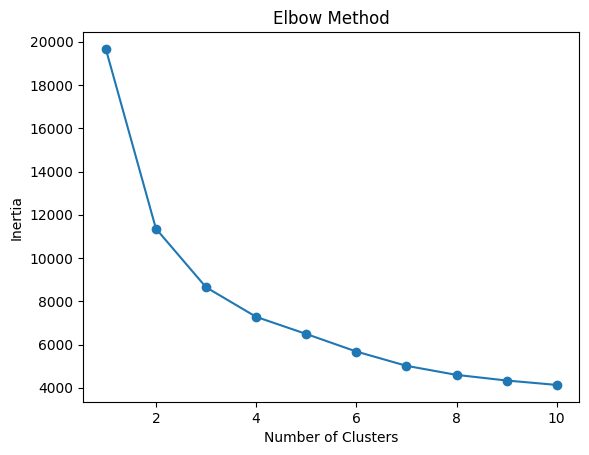

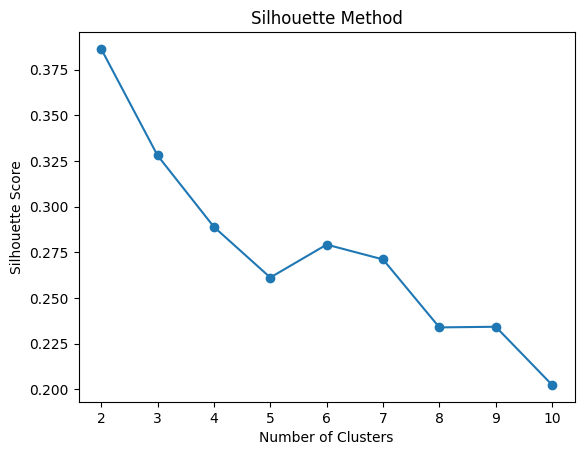

In [7]:
def plot_elbow_method(X, max_clusters=10):
    inertia_values = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

def plot_silhouette_scores(X, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Assuming X is your feature matrix containing readability indices
X = f[['automated_readability_index', 'coleman_liau_index', 'flesch_kincaid_grade_level',
       'flesch_reading_ease', 'gulpease_index', 'gunning_fog_index', 'lix', 'smog_index', 'wiener_sachtextformel', 'n_chars']]

# Data preprocessing: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the Elbow Method to determine the optimal k
plot_elbow_method(X_scaled, max_clusters=10)

# Plot the Silhouette Method to determine the optimal k
plot_silhouette_scores(X_scaled, max_clusters=10)


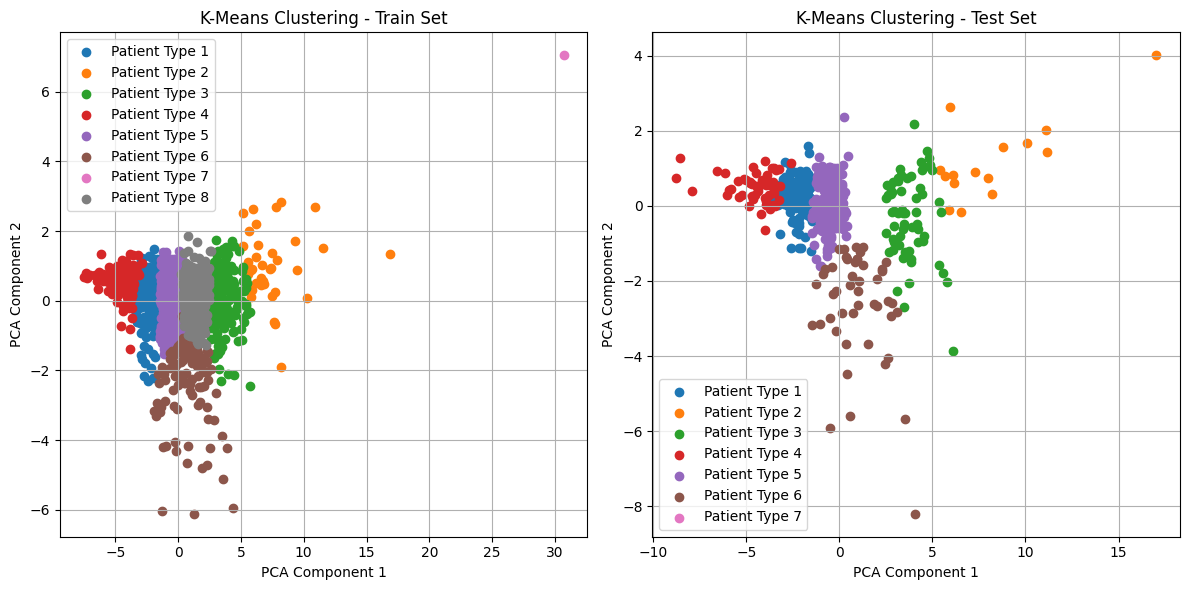

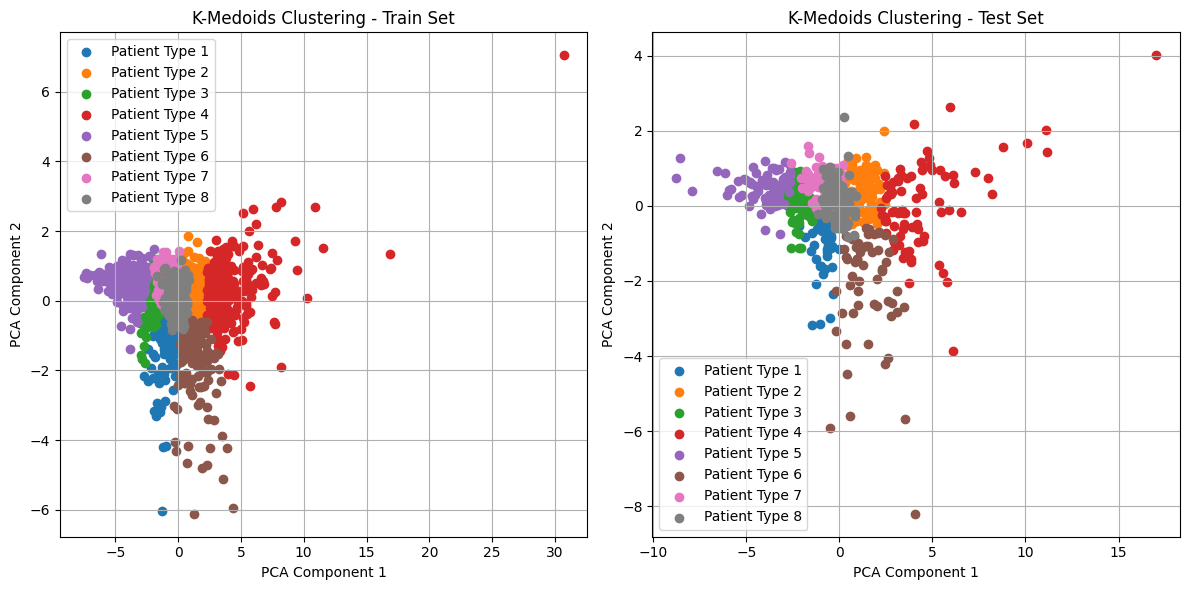

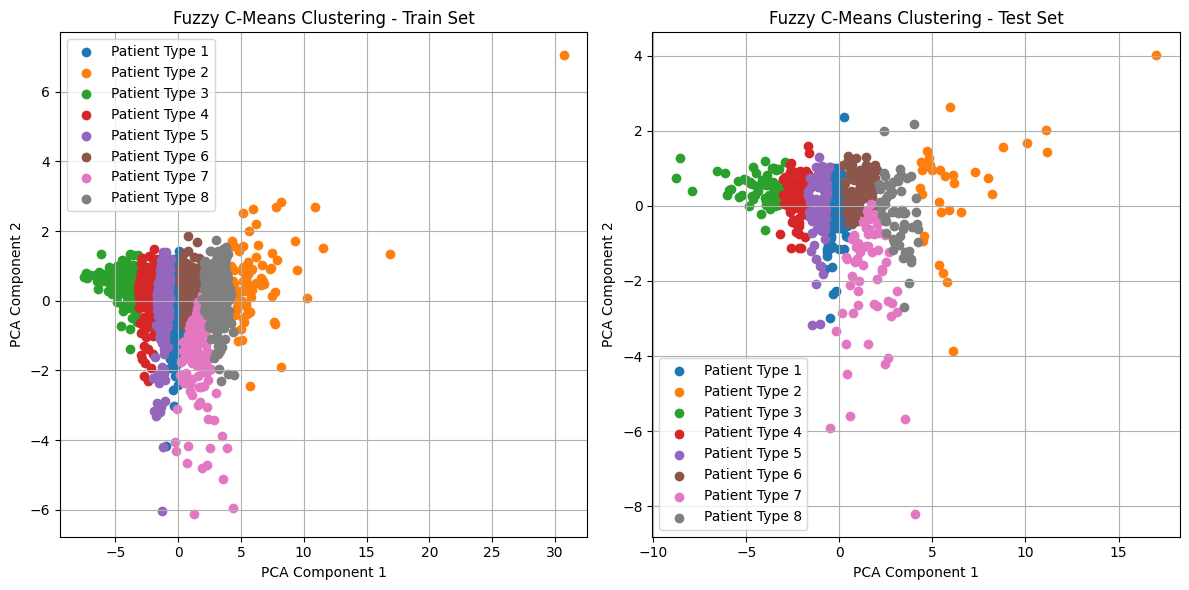

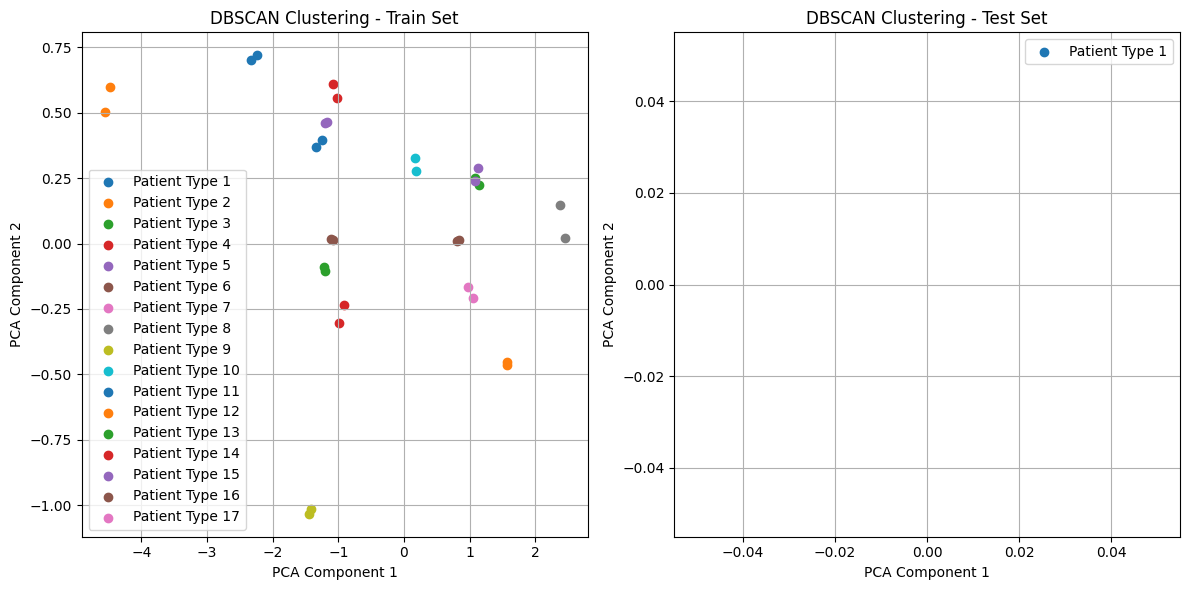

In [8]:
# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Data preprocessing: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality (optional)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

def apply_and_visualize_clustering(model, model_name, X_train, X_test, X_train_pca, X_test_pca):
    # Fit clustering model to training set
    if model_name == 'DBSCAN':
        # For DBSCAN, directly assign labels during fitting
        train_clusters = model.fit_predict(X_train)
        test_clusters = model.fit_predict(X_test)  # Use the same model instance for test set
    else:
        # For other models, use standard fit and predict
        model.fit(X_train)
        train_clusters = model.predict(X_train)
        test_clusters = model.predict(X_test)
    
    # Define cluster labels (patient types)
    cluster_labels_train = [f'Patient Type {i+1}' for i in range(len(np.unique(train_clusters)))]
    cluster_labels_test = [f'Patient Type {i+1}' for i in range(len(np.unique(test_clusters)))]
    
    # Visualize clustering on training set
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for i, cluster_label in enumerate(cluster_labels_train):
        cluster_indices = np.where(train_clusters == i)
        plt.scatter(X_train_pca[cluster_indices, 0], X_train_pca[cluster_indices, 1], label=cluster_label)

    plt.title(f'{model_name} Clustering - Train Set')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)

    # Visualize clustering on test set
    plt.subplot(1, 2, 2)
    for i, cluster_label in enumerate(cluster_labels_test):
        cluster_indices = np.where(test_clusters == i)
        plt.scatter(X_test_pca[cluster_indices, 0], X_test_pca[cluster_indices, 1], label=cluster_label)

    plt.title(f'{model_name} Clustering - Test Set')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Define and apply K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
apply_and_visualize_clustering(kmeans, 'K-Means', X_train_scaled, X_test_scaled, X_train_pca, X_test_pca)

# Define and apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=8, random_state=42)
apply_and_visualize_clustering(kmedoids, 'K-Medoids', X_train_scaled, X_test_scaled, X_train_pca, X_test_pca)

# Define and apply Fuzzy C-Means clustering
fcm = FCM(n_clusters=8)
apply_and_visualize_clustering(fcm, 'Fuzzy C-Means', X_train_scaled, X_test_scaled, X_train_pca, X_test_pca)

# Define and apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=2)
apply_and_visualize_clustering(dbscan, 'DBSCAN', X_train_scaled, X_test_scaled, X_train_pca, X_test_pca)

Evaluation Metrics for K-Means Clustering: (Train Set)
Silhouette Score: 0.2289441685333693
Davies-Bouldin Index: 1.0644809546257754

Evaluation Metrics for K-Means Clustering: (Test Set)
Silhouette Score: 0.2231661326998628
Davies-Bouldin Index: 1.182822974352333

Evaluation Metrics for Tree-based Clustering: (Train Set)
Silhouette Score: 0.20029843421997037
Davies-Bouldin Index: 1.10162353667082

Evaluation Metrics for Tree-based Clustering: (Test Set)
Silhouette Score: 0.1844778443935727
Davies-Bouldin Index: 1.1257717609405409



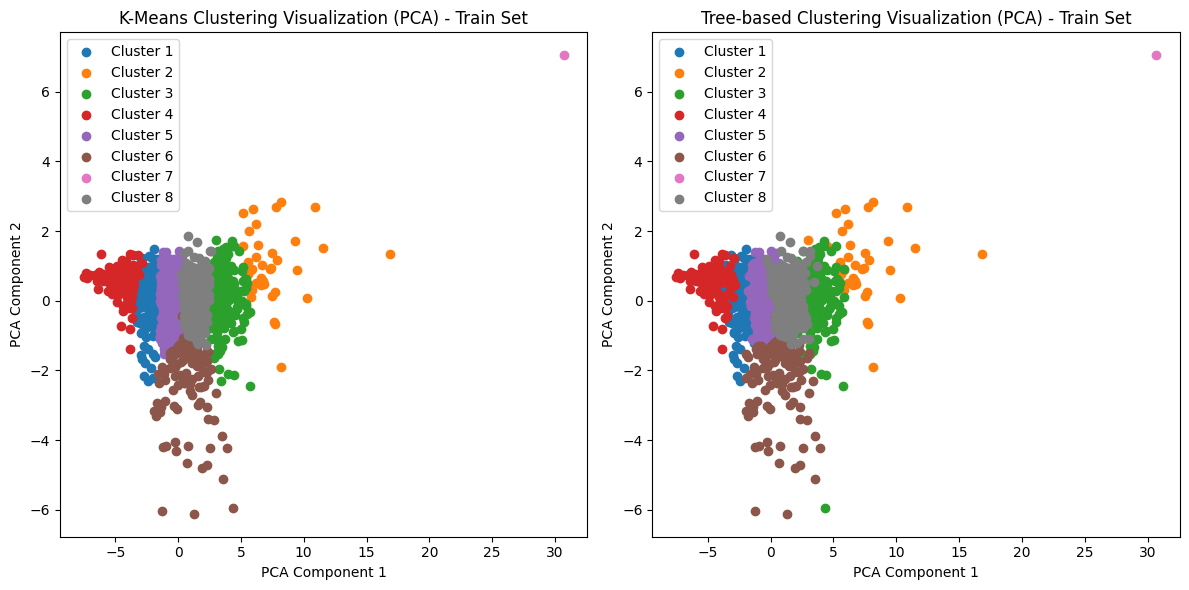

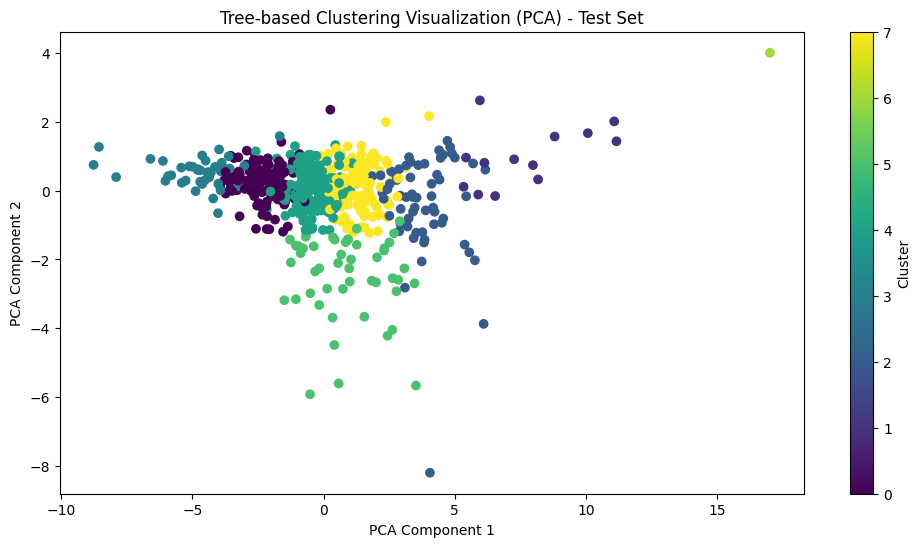

<Figure size 1600x1200 with 0 Axes>

In [21]:
# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Data preprocessing: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality (optional)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the number of clusters (K)
n_clusters = 8

# Apply K-Means clustering as a baseline
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=1, max_iter=40)
cluster_labels_kmeans = kmeans.fit_predict(X_train_scaled)

# Apply K-Means clustering to the test set
cluster_labels_kmeans_test = kmeans.predict(X_test_scaled)

# Create and fit the Tree model for tree-based clustering
k_tree = 8  # Specify the number of clusters for the Tree model
max_leaves = 2 * k_tree  # Set maximum number of leaves based on desired granularity
tree_model = Tree(k=k_tree, max_leaves=max_leaves)
cluster_labels_tree = tree_model.fit_predict(X_train_scaled, kmeans=kmeans)

# Apply Tree-based clustering to the test set
cluster_labels_tree_test = tree_model.predict(X_test_scaled)

# Calculate silhouette score and Davies-Bouldin index for K-Means for Train Set
silhouette_avg_kmeans_train = silhouette_score(X_train_scaled, cluster_labels_kmeans)
davies_bouldin_idx_kmeans_train = davies_bouldin_score(X_train_scaled, cluster_labels_kmeans)

# Calculate silhouette score and Davies-Bouldin index for K-Means for Test Set
silhouette_avg_kmeans_test = silhouette_score(X_test_scaled, cluster_labels_kmeans_test)
davies_bouldin_idx_kmeans_test = davies_bouldin_score(X_test_scaled, cluster_labels_kmeans_test)

# Calculate silhouette score and Davies-Bouldin index for Tree-based clustering for Train Set
silhouette_avg_tree_train = silhouette_score(X_train_scaled, cluster_labels_tree)
davies_bouldin_idx_tree_train = davies_bouldin_score(X_train_scaled, cluster_labels_tree)

# Calculate silhouette score and Davies-Bouldin index for Tree-based clustering for Test Set
silhouette_avg_tree_test = silhouette_score(X_test_scaled, cluster_labels_tree_test)
davies_bouldin_idx_tree_test = davies_bouldin_score(X_test_scaled, cluster_labels_tree_test)

# Print evaluation metrics for both clustering methods
print("Evaluation Metrics for K-Means Clustering: (Train Set)")
print(f"Silhouette Score: {silhouette_avg_kmeans_train}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx_kmeans_train}\n")

print("Evaluation Metrics for K-Means Clustering: (Test Set)")
print(f"Silhouette Score: {silhouette_avg_kmeans_test}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx_kmeans_test}\n")

print("Evaluation Metrics for Tree-based Clustering: (Train Set)")
print(f"Silhouette Score: {silhouette_avg_tree_train}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx_tree_train}\n")

print("Evaluation Metrics for Tree-based Clustering: (Test Set)")
print(f"Silhouette Score: {silhouette_avg_tree_test}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx_tree_test}\n")

# Visualize K-Means clustering in PCA space
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster in range(n_clusters):
    cluster_indices_train = np.where(cluster_labels_kmeans == cluster)
    plt.scatter(X_train_pca[cluster_indices_train, 0], X_train_pca[cluster_indices_train, 1], label=f'Cluster {cluster+1}')

plt.title('K-Means Clustering Visualization (PCA) - Train Set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# Visualize Tree-based clustering in PCA space for Train Set
plt.subplot(1, 2, 2)
for cluster in range(k_tree):
    cluster_indices_train = np.where(cluster_labels_tree == cluster)
    plt.scatter(X_train_pca[cluster_indices_train, 0], X_train_pca[cluster_indices_train, 1], label=f'Cluster {cluster+1}')

plt.title('Tree-based Clustering Visualization (PCA) - Train Set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize Tree-based clustering in PCA space for Test Set
plt.figure(figsize=(12, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=cluster_labels_tree_test, cmap='viridis')
plt.title('Tree-based Clustering Visualization (PCA) - Test Set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Plot and save the decision tree as an image file
plt.figure(figsize=(16, 12))
tree_model.plot('decision_tree.png')  # Save the tree plot to 'decision_tree.png'
plt.show()


In [10]:
def evaluate_clustering_performance(model, X_train, X_test, clusters_train, clusters_test):
    # Calculate Silhouette Score for training set
    silhouette_avg_train = silhouette_score(X_train, clusters_train)
    print(f"Silhouette Score ({model}) - Training Set: {silhouette_avg_train}")

    # Calculate Davies-Bouldin Index for training set
    davies_bouldin_train = davies_bouldin_score(X_train, clusters_train)
    print(f"Davies-Bouldin Index ({model}) - Training Set: {davies_bouldin_train}")

    # Calculate Silhouette Score for test set
    silhouette_avg_test = silhouette_score(X_test, clusters_test)
    print(f"Silhouette Score ({model}) - Test Set: {silhouette_avg_test}")

    # Calculate Davies-Bouldin Index for test set
    davies_bouldin_test = davies_bouldin_score(X_test, clusters_test)
    print(f"Davies-Bouldin Index ({model}) - Test Set: {davies_bouldin_test}")

# Apply and evaluate K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_clusters_train = kmeans.fit_predict(X_train_scaled)
kmeans_clusters_test = kmeans.predict(X_test_scaled)
evaluate_clustering_performance('K-Means', X_train_scaled, X_test_scaled, kmeans_clusters_train, kmeans_clusters_test)

# Apply and evaluate K-Medoids clustering
kmedoids = KMedoids(n_clusters=8, random_state=42)
kmedoids_clusters_train = kmedoids.fit_predict(X_train_scaled)
kmedoids_clusters_test = kmedoids.predict(X_test_scaled)
evaluate_clustering_performance('K-Medoids', X_train_scaled, X_test_scaled, kmedoids_clusters_train, kmedoids_clusters_test)

# Apply and evaluate Fuzzy C-Means clustering
fcm = FCM(n_clusters=8)
fcm.fit(X_train_scaled)
fcm_clusters_train = fcm.predict(X_train_scaled)
fcm_clusters_test = fcm.predict(X_test_scaled)
evaluate_clustering_performance('Fuzzy C-Means', X_train_scaled, X_test_scaled, fcm_clusters_train, fcm_clusters_test)

# Apply and evaluate DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters_train = dbscan.fit_predict(X_train_scaled)
dbscan_clusters_test = dbscan.fit_predict(X_test_scaled)  # Use the same model instance for test set
evaluate_clustering_performance('DBSCAN', X_train_scaled, X_test_scaled, dbscan_clusters_train, dbscan_clusters_test)


Silhouette Score (K-Means) - Training Set: 0.2289441685333693
Davies-Bouldin Index (K-Means) - Training Set: 1.0644809546257754
Silhouette Score (K-Means) - Test Set: 0.2231661326998628
Davies-Bouldin Index (K-Means) - Test Set: 1.182822974352333
Silhouette Score (K-Medoids) - Training Set: 0.14400211897764362
Davies-Bouldin Index (K-Medoids) - Training Set: 1.4127239748175136
Silhouette Score (K-Medoids) - Test Set: 0.15609832023652834
Davies-Bouldin Index (K-Medoids) - Test Set: 1.3755723413948657
Silhouette Score (Fuzzy C-Means) - Training Set: 0.1438223610423345
Davies-Bouldin Index (Fuzzy C-Means) - Training Set: 1.6669256259448755
Silhouette Score (Fuzzy C-Means) - Test Set: 0.135794295204349
Davies-Bouldin Index (Fuzzy C-Means) - Test Set: 1.7262091220289735
Silhouette Score (DBSCAN) - Training Set: -0.4285065241773066
Davies-Bouldin Index (DBSCAN) - Training Set: 2.2490947041340146
Silhouette Score (DBSCAN) - Test Set: -0.47002315099755804
Davies-Bouldin Index (DBSCAN) - Test S

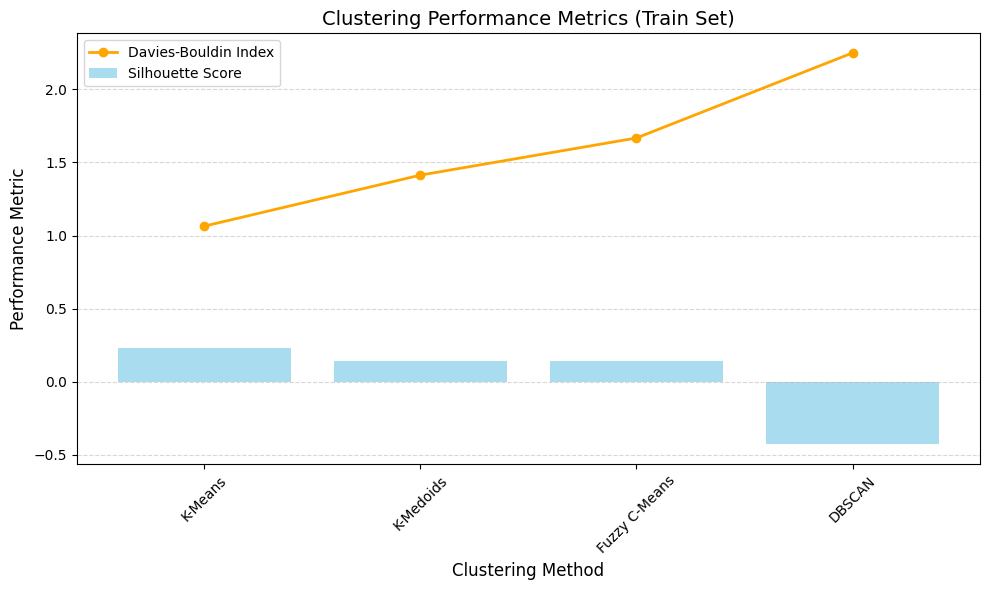

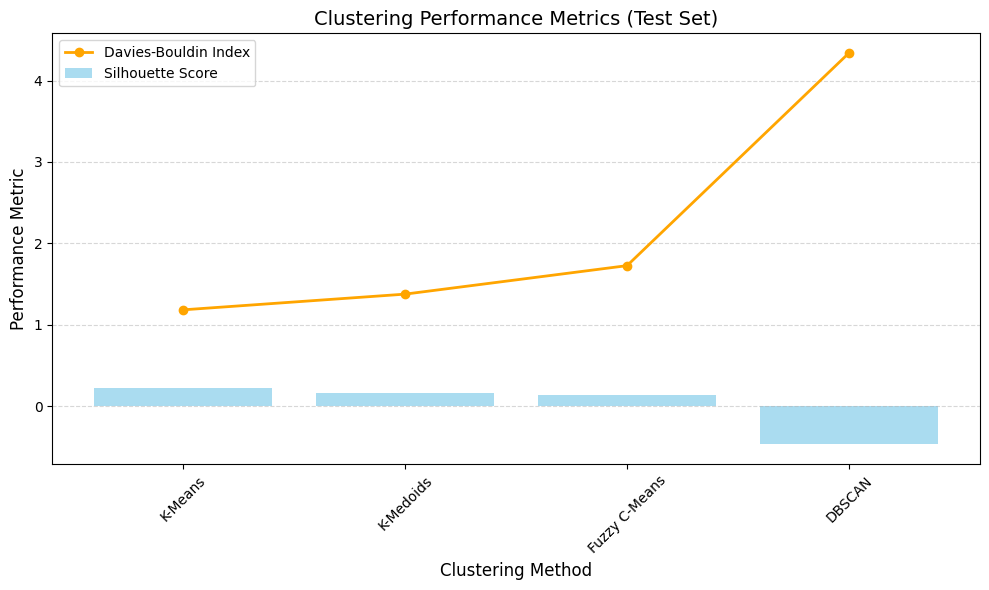

In [20]:

# Define clustering methods and corresponding metrics for train set
methods_train = ['K-Means', 'K-Medoids', 'Fuzzy C-Means', 'DBSCAN']
silhouette_scores_train = [0.229, 0.144, 0.144, -0.429]
davies_bouldin_indices_train = [1.064, 1.413, 1.667, 2.249]

# Plotting for Train Set
plt.figure(figsize=(10, 6))  # Set figure size

# Plot silhouette scores for train set
plt.bar(methods_train, silhouette_scores_train, color='skyblue', alpha=0.7, label='Silhouette Score')

# Plot Davies-Bouldin indices for train set
plt.plot(methods_train, davies_bouldin_indices_train, color='orange', marker='o', linestyle='-', linewidth=2, label='Davies-Bouldin Index')

# Add labels and title for train set
plt.xlabel('Clustering Method', fontsize=12)
plt.ylabel('Performance Metric', fontsize=12)
plt.title('Clustering Performance Metrics (Train Set)', fontsize=14)

# Add legend for train set
plt.legend(fontsize='medium')

# Add grid lines on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout
plt.show()

# Define clustering methods and corresponding metrics for test set
methods_test = ['K-Means', 'K-Medoids', 'Fuzzy C-Means', 'DBSCAN']
silhouette_scores_test = [0.223, 0.156, 0.136, -0.470]
davies_bouldin_indices_test = [1.183, 1.376, 1.726, 4.339]

# Plotting for Test Set
plt.figure(figsize=(10, 6))  # Set figure size

# Plot silhouette scores for test set
plt.bar(methods_test, silhouette_scores_test, color='skyblue', alpha=0.7, label='Silhouette Score')

# Plot Davies-Bouldin indices for test set
plt.plot(methods_test, davies_bouldin_indices_test, color='orange', marker='o', linestyle='-', linewidth=2, label='Davies-Bouldin Index')

# Add labels and title for test set
plt.xlabel('Clustering Method', fontsize=12)
plt.ylabel('Performance Metric', fontsize=12)
plt.title('Clustering Performance Metrics (Test Set)', fontsize=14)

# Add legend for test set
plt.legend(fontsize='medium')

# Add grid lines on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout
plt.show()
